# Image Derivatives and Edge Detection

### Importing Required Libraries

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import cv2 as cv

### Creating a 1D Array

This section is simply creating a 1D Numpy array that can depict one row of an image

In [2]:
x = np.array([1, 3, 4, 1, 10, 3, 0, 1])
print(x)

[ 1  3  4  1 10  3  0  1]


### Using diff function

Numpy's diff function is used to perform forward difference between the arrays

In [3]:
# n = 1 means the first derivative
y1 = np.diff(x, n=1)
print(y1)

[ 2  1 -3  9 -7 -3  1]


### Using gradient function

Numpy's gradient function is used to calculate the central differences of the array

In [4]:
y2 = np.gradient(x)
print(y2)

[ 2.   1.5 -1.   3.   1.  -5.  -1.   1. ]


### Convolution for Image Derivatives

Convolution can be used to covolve a mask designed for derivatives with the images. Below is an example of forward difference mask for convolving the array

In [5]:
kernel = np.array([1, -1])

result = signal.convolve(x,kernel)
print(result)

[ 1  2  1 -3  9 -7 -3  1 -1]


### Image Derivatives and Edge Detection

Image Derivatives highlight edge pixels

In [6]:
Hx = np.array([[1, -1]])
Hy = np.array([[1], [-1]])
print("Hx:",Hx)
print("Hy:",Hy)

Hx: [[ 1 -1]]
Hy: [[ 1]
 [-1]]


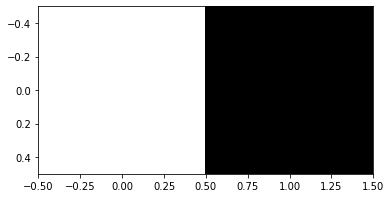

In [7]:
# Hx plot
plt.imshow(Hx, cmap="gray", interpolation='none')

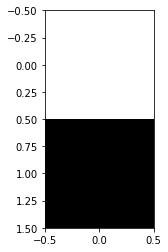

In [8]:
#Hy plot
plt.imshow(Hy, cmap="gray", interpolation='none')

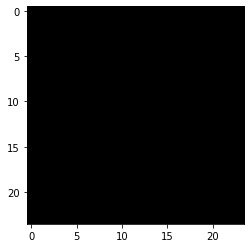

In [9]:
canvas = np.zeros((24,24))
plt.imshow(canvas, cmap="gray")

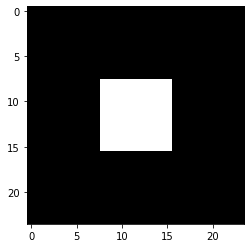

In [10]:
canvas[8:16,8:16] = 1
plt.imshow(canvas, cmap="gray")

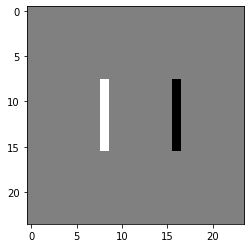

In [11]:
Hx_Canvas = signal.convolve2d(canvas, Hx, 'same')
plt.imshow(Hx_Canvas, cmap="gray")

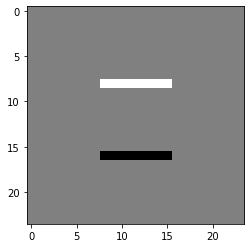

In [12]:
Hy_Canvas = signal.convolve2d(canvas, Hy, 'same')
plt.imshow(Hy_Canvas, cmap="gray")

### Applying Image Derivatives on an Image

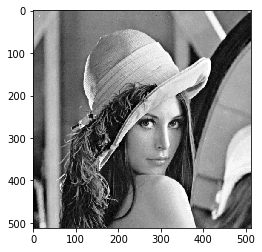

In [13]:
image = cv.imread("Lena.png")
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image_gray, cmap='gray')

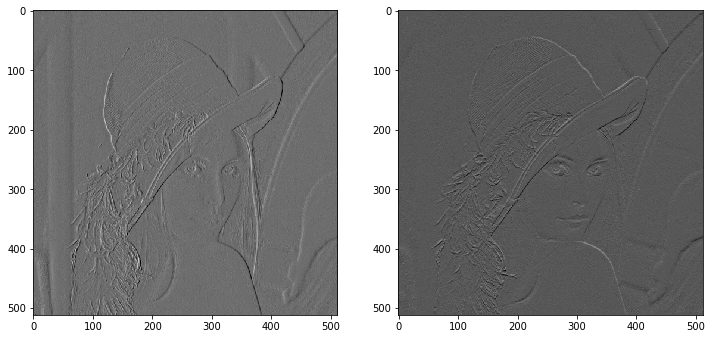

In [14]:
hx_image = signal.convolve2d(image_gray, Hx, 'same')
hy_image = signal.convolve2d(image_gray, Hy, 'same')

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(hx_image, cmap="gray")

plt.subplot(122)
plt.imshow(hy_image, cmap="gray")

### Effect of Noise

Image Derivatives are very sensitive to noise. Having noise on images can significantly reduce the tendency of image derivatives.

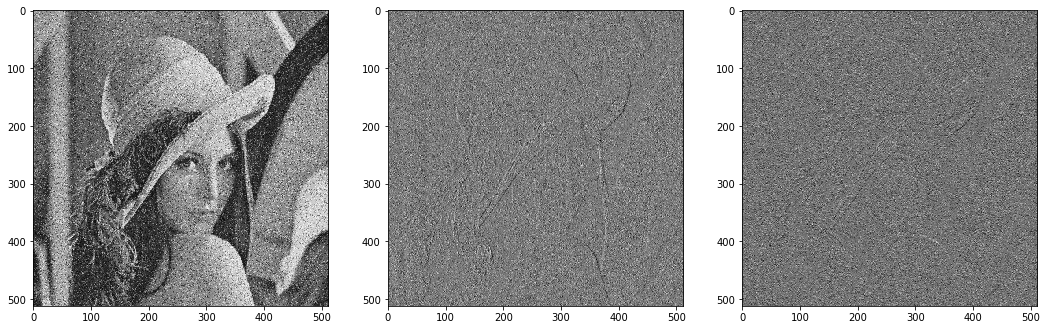

In [17]:
image_noisy = cv.imread("Lena_Noisy.jpg")
image_noisy_gray = cv.cvtColor(image_noisy, cv.COLOR_BGR2GRAY)

Hx = np.array([[1, -1]])
result_x = signal.convolve2d(image_noisy_gray, Hx, 'same')

Hy = np.array([[1], [-1]])
result_y = signal.convolve2d(image_noisy_gray, Hy, 'same')

plt.figure(figsize=(18,18))

plt.subplot(131)
plt.imshow(image_noisy_gray, cmap="gray")

plt.subplot(132)
plt.imshow(result_x, cmap="gray")

plt.subplot(133)
plt.imshow(result_y, cmap="gray")


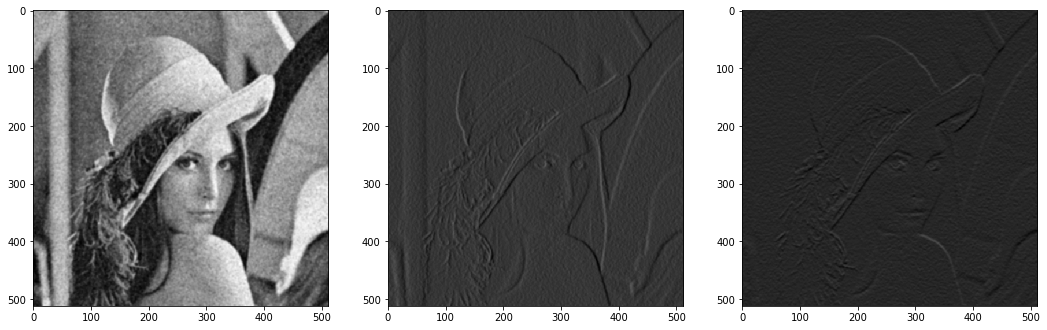

In [26]:
image_noisy = cv.imread("Lena_Noisy.jpg")
image_noisy_gray = cv.cvtColor(image_noisy, cv.COLOR_BGR2GRAY)

image_gaussian = cv.GaussianBlur(image_noisy_gray, (7,7), 0)

Hx = np.array([[1, -1]])
gaussian_x = signal.convolve2d(image_gaussian, Hx, 'same')

Hy = np.array([[1], [-1]])
gaussian_y = signal.convolve2d(image_gaussian, Hy, 'same')

plt.figure(figsize=(18,18))

plt.subplot(131)
plt.imshow(image_gaussian, cmap="gray")

plt.subplot(132)
plt.imshow(gaussian_x, cmap="gray")

plt.subplot(133)
plt.imshow(gaussian_y, cmap="gray")

### Canny Edge Detector

Still one of the most widely used edge detectors in computer vision

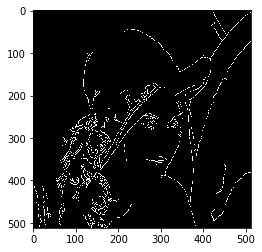

In [32]:
image_noisy = cv.imread("Lena_Noisy.jpg")
image_noisy_gray = cv.cvtColor(image_noisy, cv.COLOR_BGR2GRAY)
image_gaussian = cv.GaussianBlur(image_noisy_gray, (7,7), 0)

canny_image = cv.Canny(image_gaussian, 50, 200)

plt.imshow(canny_image, cmap="gray")

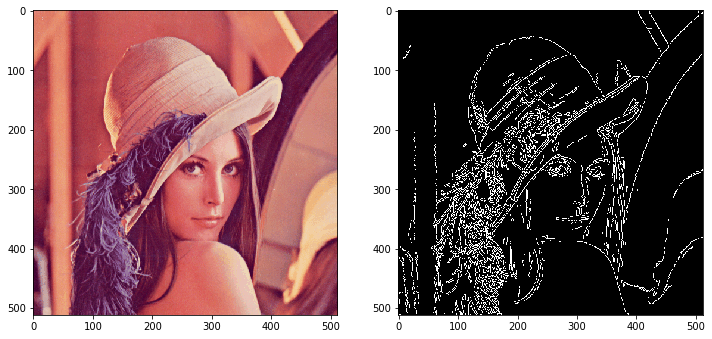

In [44]:
image = cv.imread("Lena.png")
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_gray = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

canny_image = cv.Canny(image_gray, 60, 120, apertureSize=3, L2gradient=True)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image_rgb)

plt.subplot(122)
plt.imshow(canny_image, cmap="gray")